In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# f(x) -  функция порождающяя данные
# Если углублятся, то можно назвать эту функцию природным правилом
# Что самое интересное мы никогда не узнаем как выглядит эта функция на самом деле
# Все что мы можем делать это попробовать апроксимировать при помощи моделей

def f(x):
  return (2 * x) + 2 

# Создаем линейной пространоство от -100 до 100 и в нем будет 200 чисел
X = np.array([[x] for x in np.linspace(0, 10, 10)])
# Вычисляем отклик
y = np.array([(f(x) + np.random.randn()) for x in X])

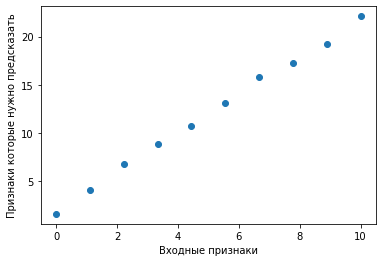

In [ ]:
plt.scatter(X, y);
plt.xlabel("Входные признаки")
plt.ylabel("Признаки которые нужно предсказать");

X - это вектор входных значений

In [ ]:
X

array([[ 0.        ],
       [ 1.11111111],
       [ 2.22222222],
       [ 3.33333333],
       [ 4.44444444],
       [ 5.55555556],
       [ 6.66666667],
       [ 7.77777778],
       [ 8.88888889],
       [10.        ]])

In [ ]:
X.shape

(10, 1)

y - вектор выходных признаков

In [ ]:
y

array([[ 1.55575175],
       [ 4.02134821],
       [ 6.74799439],
       [ 8.80551605],
       [10.74205658],
       [13.0445748 ],
       [15.83335106],
       [17.26769793],
       [19.28643931],
       [22.12270174]])

# Обучение линейной регрессии

1) При помощи нормального уравнения

В данном случае мы должны минимизироать MSE. Сделаем это путем приравнивая градиент (градиент это вектор своим направлением указывающий на наискорейщее возрастание функциии) к нулю.

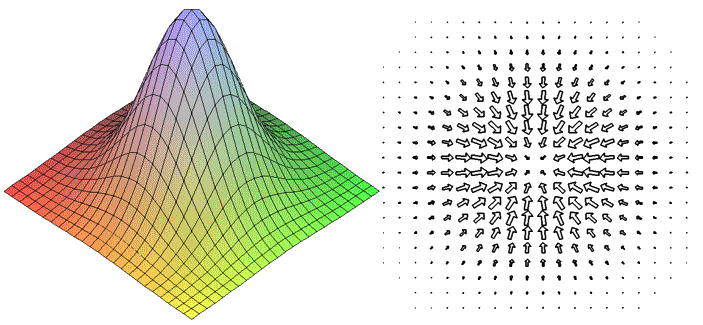

$∇_{w}MSE_{train} = 0\\
∇_{w}\frac{1}{m}\|\hat{y}^{train}-\hat{y}^{test}\|_{2}^2 = 0\\
\frac{1}{m}∇_{w}\|Xw - y\|_{2}^2 = 0\\
∇_{w}(Xw - y)^T (Xw - y) = 0\\
∇_{w}(w^T X^T X w - 2w^T X^T y + y^T y) = 0\\
2X^T Xw -  2X^T y = 0\\
w = (X^T X)^{-1} X^T y$

In [ ]:
# Небольшой код для реализации обучения линейной регрессии
class Regression(object):
  def __init__(self, use_bias=True):
    self.use_bias_ = use_bias
  
  def fit(self, X, y):
    assert X.shape[0] >= 2, "На входе должна быть матрица!"
    assert X.shape[0] == y.shape[0], "Количество строк в матрице X должно быть равно количеству значений в векторе y."

    self.X_ = X
    self.y_ = y
    self.dim_ = X.shape[-1]

    if self.use_bias_:
      X_new = np.ones(shape=(np.array(X.shape) + np.array([0, 1])))
      for i, vec in enumerate(X):
        for j, num in enumerate(vec):
          X_new[i][j] = num
      X = X_new

    # Нормальное уравнение
    self.w_ = (np.linalg.inv((X.T @ X)) @ X.T) @ y

    # error add var
    print("Ошибка линейной регресии - ", MSE(y, X @ self.w_))

  def predict(self, X):
    assert self.dim_ == X.shape[-1], "Количество признаков должно быть таким же как в момент обучений."

    if (len(X.shape) != 2):
      X = np.array([X])

    if self.use_bias_:
      X_new = np.ones(shape=(np.array(X.shape) + np.array([0, 1])))
      for i, vec in enumerate(X):
        for j, num in enumerate(vec):
          X_new[i][j] = num
      X = X_new
    
    try:
      return X @ self.w_
    except AttributeError:
      print("Для начала следует обучить модель")

  
def MSE(y_true, y_pred):
  assert y_true.shape == y_pred.shape, "Разные размеры векторов меток."
  return sum((y_true - y_pred) * (y_true - y_pred)) / len(y_true)

In [ ]:
model = Regression()
model.fit(X, y)

Ошибка линейной регресии -  [0.09267466]


In [ ]:
model.w_

array([[2.00696034],
       [1.90794149]])

In [ ]:
model.predict(np.array([[2], [5]]))

array([[ 5.92186217],
       [11.94274318]])

In [ ]:
def draw_dividing_line(model, a=-100, b=100, count=200):
  """
  Функция рисует линию которую предсказала модель
  """
  x = np.array([[x] for x in np.linspace(0, 10, 10)])
  y = np.array([model.predict(x)[0] for x in X])
  
  plt.plot(x, y)
  plt.title(f"Model's function is y = {model.w_[0][0]} + x * {model.w_[1][0]}")

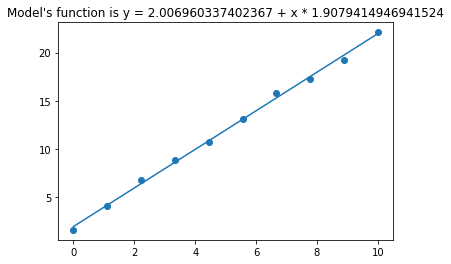

In [ ]:
draw_dividing_line(model)
plt.scatter(X, y);

Ну мы не будем все время писать алгоритмы машинного обучения. Это долго и сложно. Поэтому мы будем использовать библиотеку машинного обучения scikit-learn.

# Примеры

## Пример обучения с помощью нормального уравнения

Будем пытаться апроксимировать функцию.


$y = 3x + 4$

Шум есть неучтенные переменные, ошибки измерения и т.д.

In [ ]:
# Будем пользоваться нотацией где заглавные буквы означают многомерные структуры
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

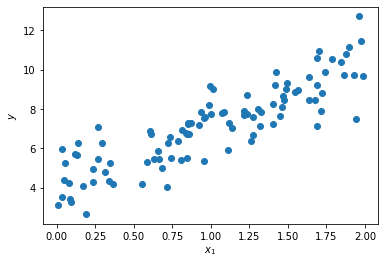

In [ ]:
plt.scatter(X, y)
plt.xlabel("$x_{1}$")
plt.ylabel("$y$");

In [ ]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)

lin_reg = LinearRegression() # Сюда можно вводить гиперпараметры
lin_reg.fit(X, y)            # Обучение линейно регрессии

LinearRegression()

Наш коофицент полученные при обучении

In [ ]:
lin_reg.coef_

array([[3.10985684]])

Наше смещение

In [ ]:
lin_reg.intercept_

array([4.03985957])

Построим функцию востановленную из данных

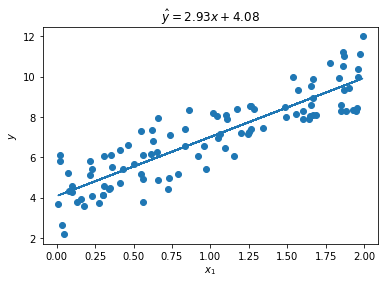

In [ ]:
plt.plot(X, lin_reg.predict(X))
plt.scatter(X, y)
plt.xlabel("$x_{1}$")
plt.ylabel("$y$")
plt.title(f"$\haty = {round(lin_reg.coef_[0][0], 2)}x + {round(lin_reg.intercept_[0], 2)}$");

Неплохо учитывая что из-за шума невозможно точно определить исходную функцию

Нормальное уравнение становится очень медленным способом обучения когда количество признаков серьезно возрастает. Это связанно и с асимпототической функцией нашего алгоритма - $O(n^2)$. То есть при возрастании **признаков** в раза 2 , то количество вычислений станет в 4 раза больше.

Это ни в коем случае не говорит о том что такой способ обучения плох.

## Градиентый спуск

Градиентный спуск представляет собой общий алгоритм оптимизации, способный находить оптимальные решения широкого диапазона задач.

Основная идея его заключается в том, чтобы итеративно подстроить параметры для доведения до минимума функции издержек.

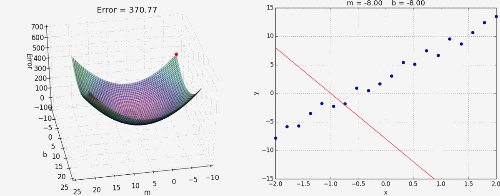

Для наглядности реализуем простой алгоритм градиентого спуска.

Придумаем себе задачу:

Дана функция $у = x^2$ найти минимум функции (минимум может быть как глобальным так и локальным).

В простом случае вы бы просто нашли производную и прировняли к нулю. Но надо заметить что большинство алгоритмов не имеют аналитического решения.

In [ ]:
def f(x):
  """
  Наша функция
  """
  return x * x

def df_dx(f, point, epsilon=0.00001):
  """
  Приближенно вычисление производной
  """
  return (f(point + epsilon) - f(point)) / epsilon

print("Апроксимация: ", df_dx(f, 3))

def df_dx(point):
  """
  Если вы знаете аналитическую форму прозводной 
  """
  return 2 * point
print("Аналитическая: ", df_dx(3))

Апроксимация:  6.000009999951316
Аналитическая:  6


Теперь представим что x это параметр нашей модели. Изменяя этот параметр мы изменяем отклик y. Наша задача найти такой x при котором y будет минимальным.

In [ ]:
alpha = 0.001                   # Шаг обучения
steps = 1000                    # Количество шагов
x = np.random.randint(0, 10)    # Указываем стартовый диапазон
print(f"Стартовая точка: {x} с значением y - {f(x)}")

for i in range(steps):
  x = x * -alpha * df_dx(x)
print(f"Конечная точка: {x} с значением y - {f(x)}")

Стартовая точка: 3 с значением y - 9
Конечная точка: -0.0 с значением y - 0.0


Вот так просто можно решить задачу по нахождению минимума. Только это задача слишком легка. Это связанно с тем что у нас функция монотонно возрастающяя. А представьте себе функцию с 20 млрд измерений! Да-да это и есть обучение неронных сетей. Перемещение по 20 млрд измерению в поисках такого места где значение функции издержек минимально. Что-то я все слишком усложнил. Совсем забыл кто это будет читать.

Все это можете интерпретировать как спуск лыжника с горы.

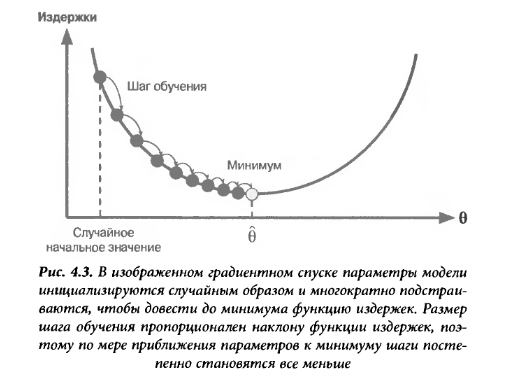

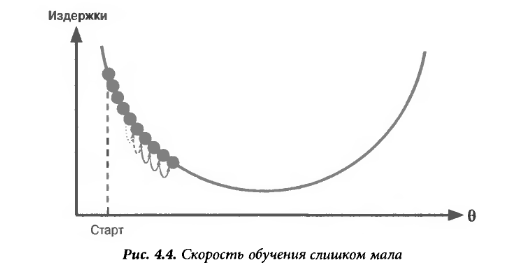

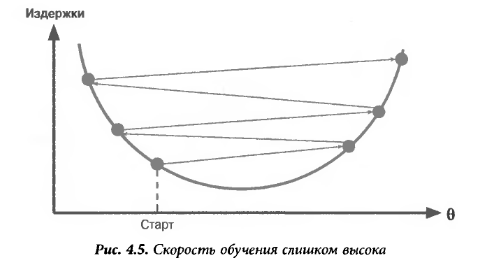

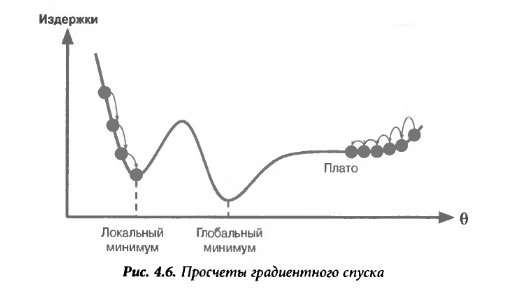

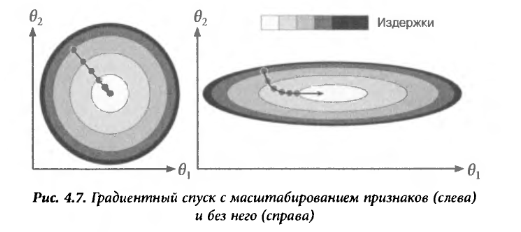

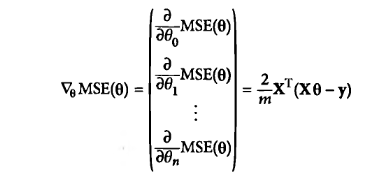

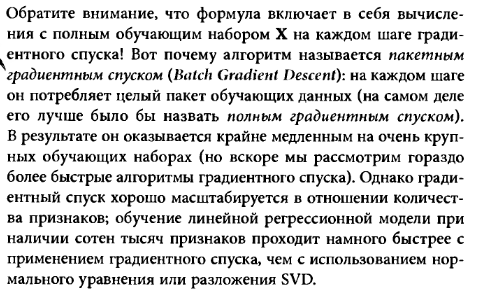

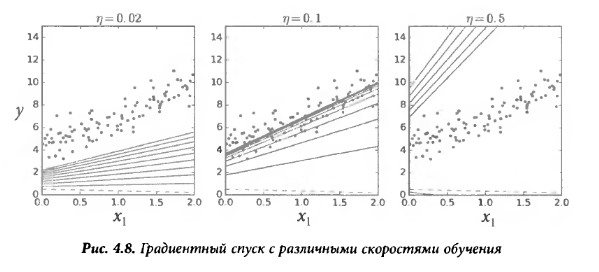

image.png

## Стаохастический градиентный спуск

Главная проблема с пакетным градиентным спуском - тот факт что он использует полный обучающий набор для вычислений градиентов на каждом шаге, который делает его очень медленным в случае крупного набора данных. Стаохастический градиентный спуск выбирает случайных образец и вычисляет градиенты на основе только единтсвенного образца. Очевидно что это делает его очень быстрым. Это делает возможность обучения на огромном наборе данных. С другой стороны, из-за стохастической(случайной) природы алгоритма он гораздо менее стабилен. Вместо стабильного спуска он будет словно пьяный батя спускающийся с лестницы метаться из стороны в сторону. Даже дойдя до минимума он не остановится. В конце концов вы получаете хорошие финальные параметры модели, но не оптимальные.

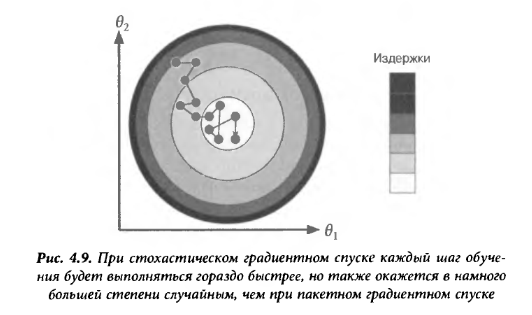

Однако когда функция издержек нерегялярная  то фактический у нашего алгоритма больше шансов выбратся из локального минимума. Следовательно случайность хороша, что бы избегать локальных минимумов, но плоха из-за того что алгоритм может просто не сойтись.

Ну что же обучим свою модель с помощью стохастического град спуска.

In [ ]:
from sklearn.linear_model import SGDRegressor

# Выставим гиперпараметры
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
# Максимально 1000 итерация или до тех пор пока потери не упадут ниже 1e-3
# penalty это тип регуляризации, eta0 это начальная скорость обучения
sgd_reg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.0361547]), array([2.90539977]))

## Мини пакетный градиентный спуск

Этот алгоритм в отлчие от других вычисляет градиентны основываясь на мини пакетах(отсюда и название). В отличие от стохастического вы можете получить заментный прирост производительности от аппаратных оптимизации матричных операция особенно когда используют графические процессоры.

Так же продвижение алгоритма в простанстве параметров менее непредсказумо, чему стохастического, в особенности при довольно крупных мини-пакетах. В результате наш алгоритм перастанет блужадать ближе к минимуму. Но ему будет труднее уйти от локальных минимумов.

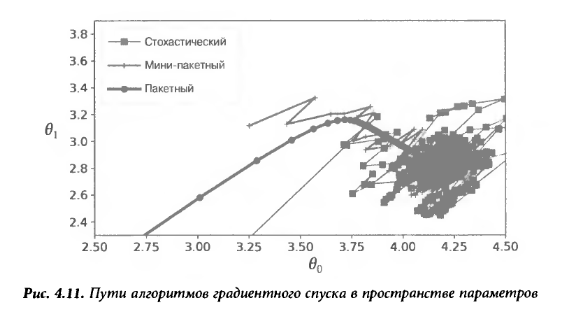

В итоге можно составить такую таблицу

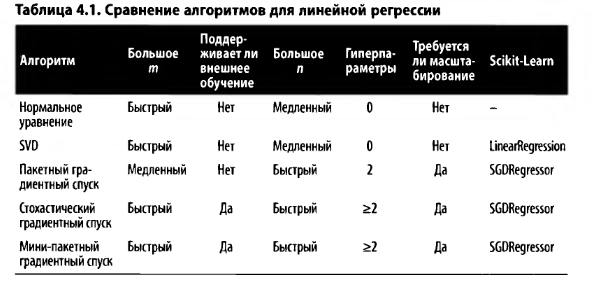

# Полиномиальная регрессия

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Как вы можете видеть здесь линейная регрессия немного не пойдет

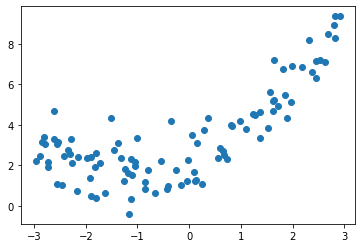

In [ ]:
plt.scatter(X, y)

Но стоит применить одну фишку. Ее часто называют feature engineering. Ну или человечески говоря добавим многочлены (полиномы) в нашу модель.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.87649303])

In [ ]:
X_poly[0]

array([-2.87649303,  8.27421218])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.1987907]), array([[1.01876889, 0.45120295]]))

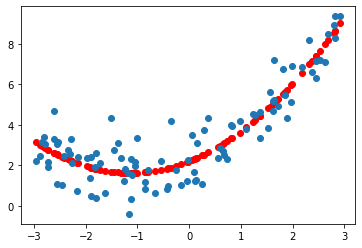

In [ ]:
# Красные предсказанные значения
plt.scatter(X_poly[:, 0], lin_reg.predict(X_poly), c="r")
plt.scatter(X, y);

Не стоит забывать про перебучение. К примеру

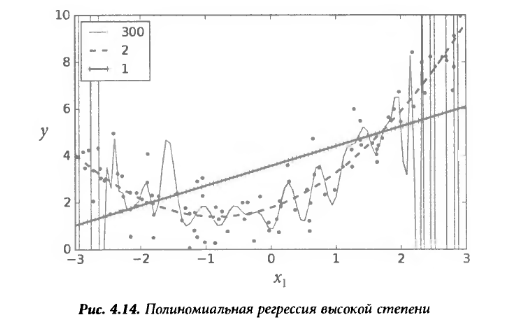

Есть один способ увидеть переобучение. Это кривые обучения. Они представляют собой графики эффективности модели на обучающем и проверочном наборе.

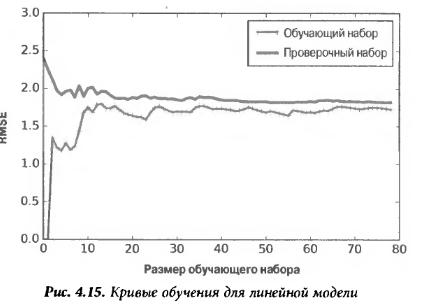

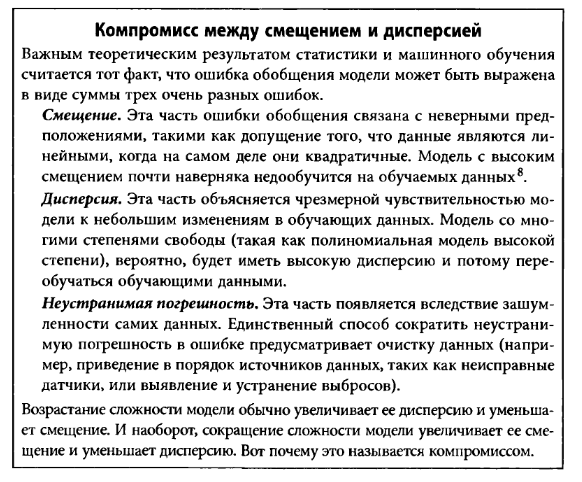

# Регуляризация

Простой метод регуляризации это уменьшение количество полиномом у модели. 

Другие спсособы это штрафы для весов. 


## Гребневая регрессия

Гребневая регрессия (так же называемая регяляризация по Тихоновому) является регуляризированной версией линейной регрессии. К функции издержек добавляется член регуляризации равный $α Σ^n_{i=1}θ^2_{i}$

Когда альфа равна 0 тогда это обычная линейная регрессия

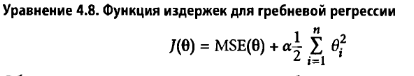

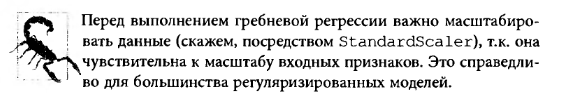

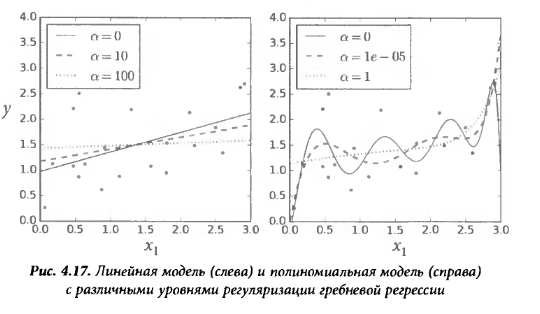

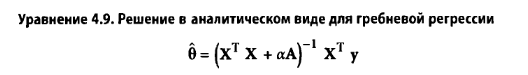

## Лассо-регрессия

К функции издержек добавляется следующий коофицент: $αΣ^n_{i=1}|θ_{i}|$

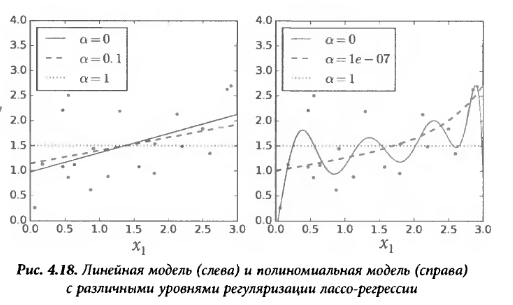

Важной особенностью лассо-регрессии является то, что она стремится полностью исключить веса наименее важных признаков (т.е устанавливает их в 0).

## Элластичная сеть

Это смесь двух предыдущих регяляризаций.

# Конвееры

Почему же конвееры? Мы что на заводе? Нет конвееры это набор последовательно выполнямых операций над данными. Конвееры содержат в себе как функции обработки, нормализации, функции прогнозирования и т.д.

Сейчас мы построим конвеер МО.

Но для начала познакомимся с некоторыми штуками...

## Нормализация

$X_{norm} = \frac{x - X_{min}}{X_{max}-X_{min}}$

Нормализация подгоняет данные в заданные рамки. Чаще всего будем использовать от 0 до 1 (Так удобнее).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = [[4, 1, 2, 2],
     [1, 3, 9, 3],
     [5, 7, 5, 1]]

# feature_range - принимает диапазон нормализованных значений
MinMaxScaler(feature_range=(0, 1)).fit_transform(X)

array([[0.75      , 0.        , 0.        , 0.5       ],
       [0.        , 0.33333333, 1.        , 1.        ],
       [1.        , 1.        , 0.42857143, 0.        ]])

## Стандартизация

$z = \frac{x - 𝜇}{σ}$

А вот Z оценку вы должны помнить с курса мат статистики. Ну хорошо z оценка показывает насколько стандартных отклонений данные отклонились относительно мат ожидания. 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
scaler.transform(X)

array([[ 0.39223227, -1.06904497, -1.16247639,  0.        ],
       [-1.37281295, -0.26726124,  1.27872403,  1.22474487],
       [ 0.98058068,  1.33630621, -0.11624764, -1.22474487]])

Среднее значение как и стандартное отклонение считается по столбцам

In [ ]:
scaler.mean_

array([3.33333333, 3.66666667, 5.33333333, 2.        ])

In [ ]:
scaler.var_

array([2.88888889, 6.22222222, 8.22222222, 0.66666667])

## l1, l2 регуляризация

$X_{norm} = \frac{x}{||x||_{n}}$

Норма что такое сами загуглите. Лень да? Норма это обобщение расстояния в векторном (линейном) пространстве. К примеру норма l2 это евклидово расстояние. Норма обозначается через $||x||_{n}$ - n норма.

In [ ]:
from sklearn.preprocessing import Normalizer

Normalizer(norm="l1").fit(X).transform([[1, 1, 2, 0]])

array([[0.25, 0.25, 0.5 , 0.  ]])

In [ ]:
Normalizer(norm="l2").fit(X).transform([[1, 1, 2, 0]])

array([[0.40824829, 0.40824829, 0.81649658, 0.        ]])

Максимальная норма выбирает максимальный элемент в векторе.

In [ ]:
Normalizer(norm="max").fit(X).transform([[1, 1, 2, 0]])

array([[0.5, 0.5, 1. , 0. ]])

Кому непонятно вот ссылка https://russianblogs.com/article/60291121013/

## Конвееры

Вы ребятки умные вот сайт читайте за что каждый параметр отвечает: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

pipeline = Pipeline([
                      ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                      ("std_scaler", StandardScaler())
])

# Создаем датасет
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Позволяем данным пройтись по конвееру предварительной обработки
pipeline.fit_transform(X)

array([[ 0.64172327,  0.46330804,  0.26631753, ..., -0.18086005,
        -0.18020928, -0.17956845],
       [-1.45925376, -1.10944426, -0.90377201, ..., -0.18086005,
        -0.18020928, -0.17956845],
       [-1.04541345, -0.98720061, -0.87217658, ..., -0.18086005,
        -0.18020928, -0.17956845],
       ...,
       [ 0.4300108 ,  0.19738253, -0.01296354, ..., -0.18086005,
        -0.18020928, -0.17956845],
       [ 0.21923903, -0.0434417 , -0.2430624 , ..., -0.18086005,
        -0.18020928, -0.17956845],
       [-0.07702355, -0.34159594, -0.49429774, ..., -0.18086005,
        -0.18020928, -0.17956845]])

Конверы могут быть разного направления. Одни могут сразу предсказывать что-то, другие используются для предобработки

# Логистическая регрессия

Давайте возьмем более прикладную задачу. Классификация видов ириса.

In [ ]:
from sklearn.datasets import load_iris

# Загружаем набор данных
data = load_iris()

Каждый признак в векторе будет иметь следующие трактовки

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

А вот и классы которые мы будем предсказывать

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Берем первые 2 признака и первые 2 класса

In [ ]:
X = data.data[:, 0:2][:100]
y = data.target[:100]

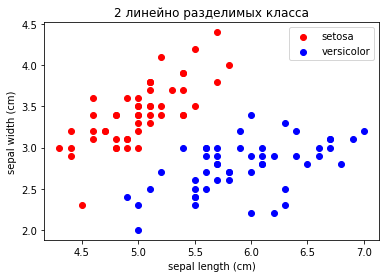

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0][:50], X[:, 1][:50], c="r", label="setosa")
plt.scatter(X[:, 0][50:100], X[:, 1][50:100], c="b", label="versicolor")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("2 линейно разделимых класса");
plt.legend();

Как мы видим данные линейно разделимы.

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X, y)

LogisticRegression()

Начертим границу решений

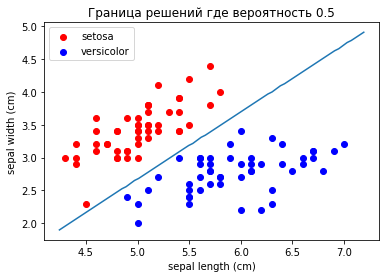

In [ ]:
d = []

for x in np.linspace(4, 8, 100):
  for y in np.linspace(1.9, 5, 100):
    if np.around(logistic_reg.predict_proba([[x, y]])[0][0], 2) == 0.5:
     d.append([x, y])

d = np.array(d)

plt.plot(d[:, 0], d[:, 1])

plt.scatter(X[:, 0][:50], X[:, 1][:50], c="r", label="setosa")
plt.scatter(X[:, 0][50:100], X[:, 1][50:100], c="b", label="versicolor")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Граница решений где вероятность 0.5");
plt.legend();

Линия немного кривая из-за округления. Если что можно было просто решить уравнение и найти границу решений. Но мне лень

Ну все теперь выполняйте самостоятельную работу!

# Задания

## Задание 1

Сделайте апроксимацию функции:

 1) $y = sin(x)$

 2) $y = x^3 - 2$

 3) $у = e^x$

 Дополнительное условие: Поэксперементируйте с регуляризацией l1, l2.

Не забудьте про то что мы проходили: нормализацию, стандартизацию, регуляризацию, полиномы(создания новых признаков).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f_1(count=50, seed=42, interval=[0, 10]):
  np.random.seed(seed) 
  X = np.random.uniform(interval[0], interval[1], (count, 1))
  y = np.sin(X) + np.random.randn(count, 1)
  return (X, y)

def f_2(count=50, seed=42, interval=[0, 10]):
  np.random.seed(seed)
  X = np.random.uniform(interval[0], interval[1], (count, 1))
  y = np.power(X, 3) - 2 + np.random.randn(count, 1)
  return (X, y)

def f_3(count=50, seed=42, interval=[0, 10]):
  np.random.seed(seed) 
  X = np.random.uniform(interval[0], interval[1], (count, 1))
  y = np.exp(X) + np.random.randn(count, 1)
  return (X, y)

def plot_function(function, **kwargs):
  """
  Отражает функцию на графике
  """
  X, y = function(**kwargs)
  plt.scatter(X, y)

def plot_dataset(X, y):
  """
  Отображает на графике ваш набор точек
  """
  plt.scatter(X, y)

def plot_prediction_line(model, interval=[0, 20]):
  """
  Отображает предсказания модели в виде графика
  """
  X = np.linspace(interval[0], interval[1], 100).reshape((100, 1))

  predictions = model.predict(X)
  plt.plot(X, predictions)

Функция 1

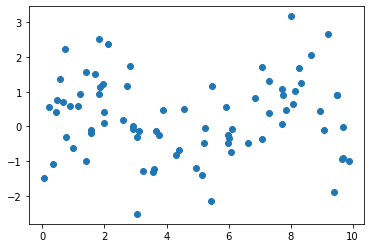

In [ ]:
plot_function(f_1, count=80, seed=42)

In [ ]:
# Обучающий набор
X_train, y_train = f_1(80)
# Тестовой набор
X_test, y_test = f_1(150, interval=(11, 20))

Функция 2

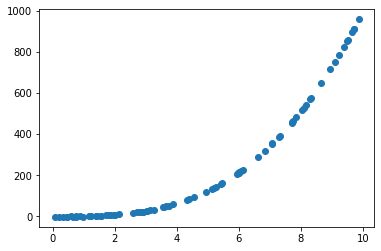

In [ ]:
plot_function(f_2, count=80, seed=42)

Функция 3

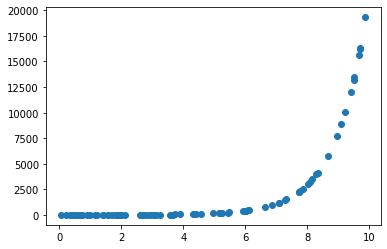

In [ ]:
plot_function(f_3, count=80, seed=42)

## Задание 2

Из набора iris обучите логистическую регрессию.

Убедительная просьба фиксируйте сиды перед тем как запускать обучение модели. Это нужно для воссоздания обучения

In [ ]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris


iris_dataset = load_iris()

df = pd.DataFrame(data=iris_dataset.data[:100], columns=iris_dataset.feature_names)
df["target"] = iris_dataset.target[:100]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


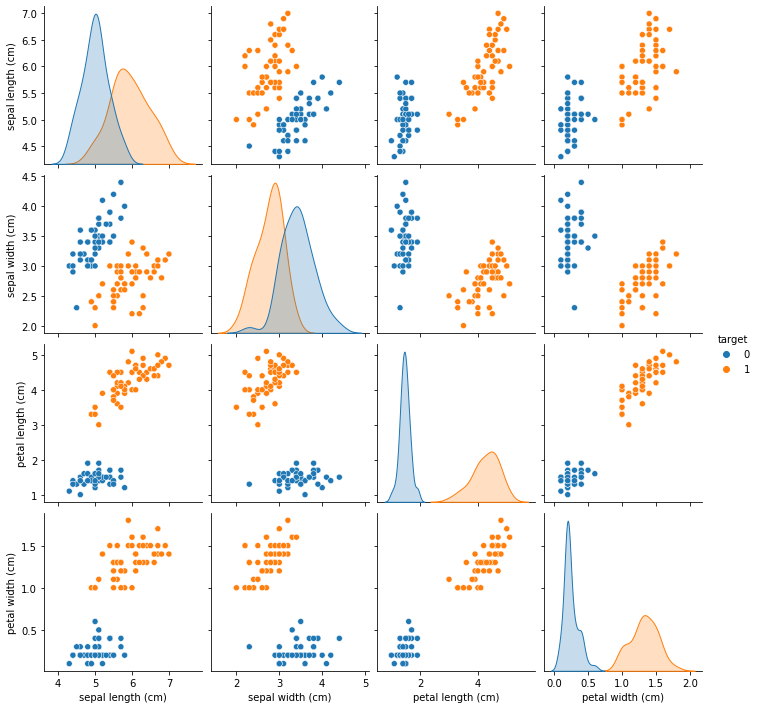

In [ ]:
sns.pairplot(df, hue="target")

In [ ]:
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

#model = 

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(df["target"], model.predict(df.drop("target", axis=1)))

1.0

## Задание 3

Создайте свой набор данных для функции. Постройте на основе этих данных конвейер машинного обучения нормализующий эти данные.